# Titanic Dataset Analysis
### Using Python (Pandas, Matplotlib, Seaborn)

**Objective:** Explore the Titanic dataset to identify meaningful insights using data cleaning, feature engineering, and statistical/visual analysis.


## 1. Data Loading


In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("train.csv")

# Show first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Data Cleaning (Handling Missing Values)


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [4]:
cols = ['Survived', 'Pclass', 'Sex', 'Embarked', 'SibSp', 'Parch']

for col in cols:
    print("\n---", col, "---")
    print(df[col].value_counts(dropna=False))



--- Survived ---
Survived
0    549
1    342
Name: count, dtype: int64

--- Pclass ---
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

--- Sex ---
Sex
male      577
female    314
Name: count, dtype: int64

--- Embarked ---
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

--- SibSp ---
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

--- Parch ---
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [5]:
# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


C:\Users\PIYUSH\AppData\Local\Temp\ipykernel_15928\2757060897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [6]:
# safer way to fill Embarked missing values
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# confirm
print("Missing values after filling:\n", df[['Embarked']].isnull().sum())


Missing values after filling:
 Embarked    0
dtype: int64


In [8]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)


In [9]:
df['Deck'] = df['Cabin'].astype(str).str[0]
df['Deck'] = df['Deck'].replace('n', 'Unknown')  # 'n' appears for NaN converted to 'nan'


In [10]:
df['Age'] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))


In [11]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
Deck             0
dtype: int64

## 3. Feature Engineering


In [12]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Combine rare titles into a single group
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 
               'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace({'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'})


In [13]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [14]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [15]:
df[['Title', 'FamilySize', 'IsAlone']].head()


,Title,FamilySize,IsAlone
0,Mr,2,0
1,Mrs,2,0
2,Miss,1,1
3,Mrs,2,0
4,Mr,1,1


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,6)


## 4. Univariate Analysis


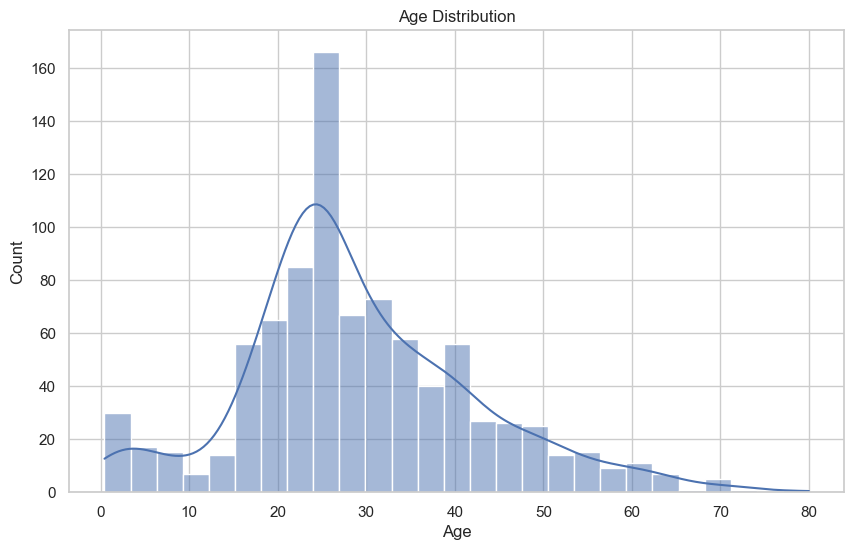

In [17]:
sns.histplot(df['Age'], kde=True)
plt.title("Age Distribution")
plt.show()


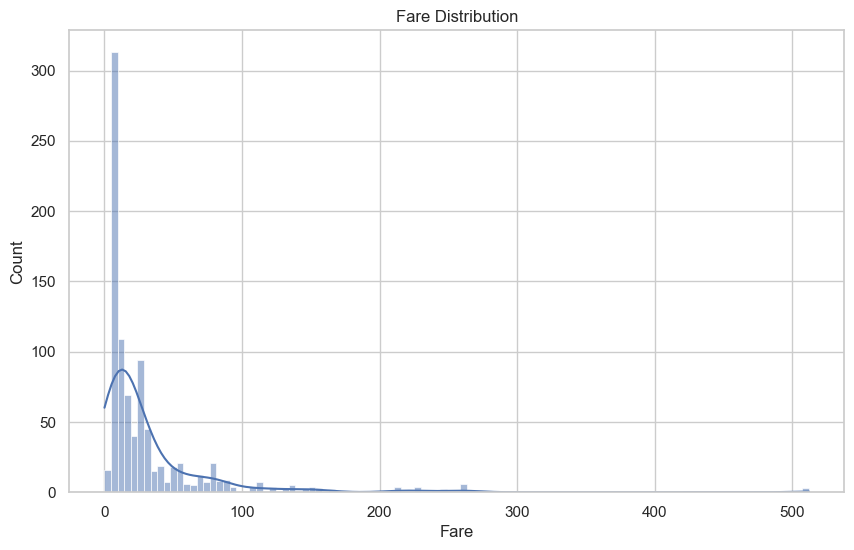

In [18]:
sns.histplot(df['Fare'], kde=True)
plt.title("Fare Distribution")
plt.show()


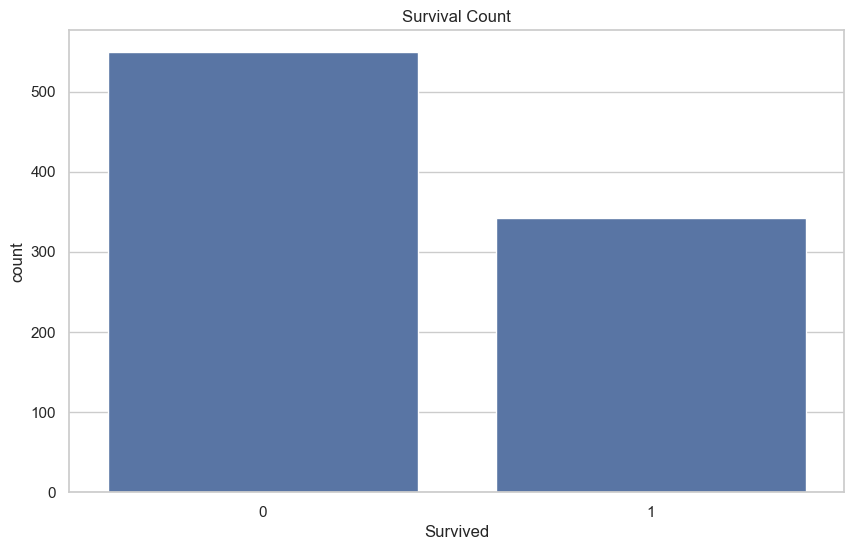

In [19]:
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()


## 5. Bivariate Analysis


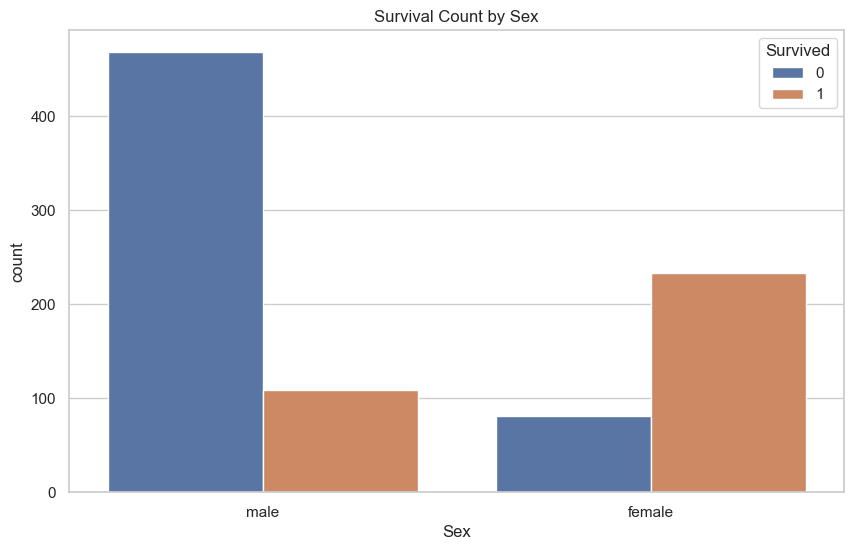

In [20]:
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Count by Sex")
plt.show()


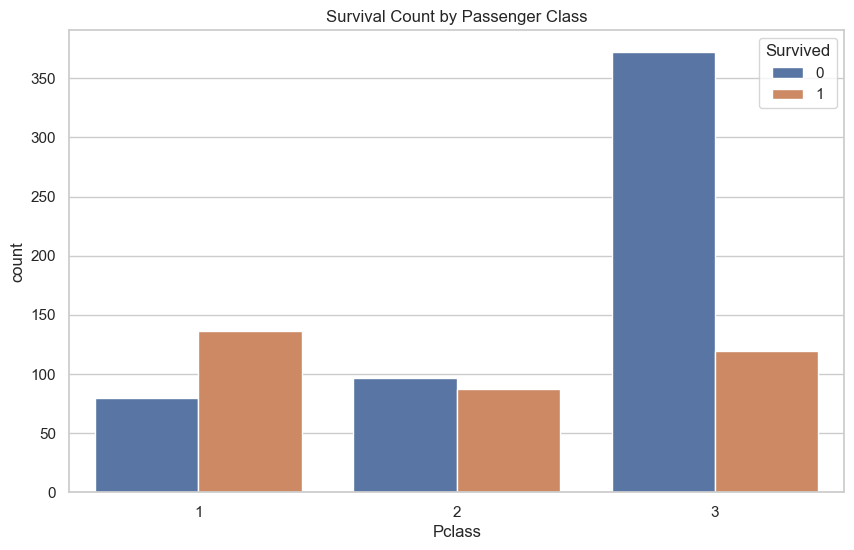

In [21]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Count by Passenger Class")
plt.show()


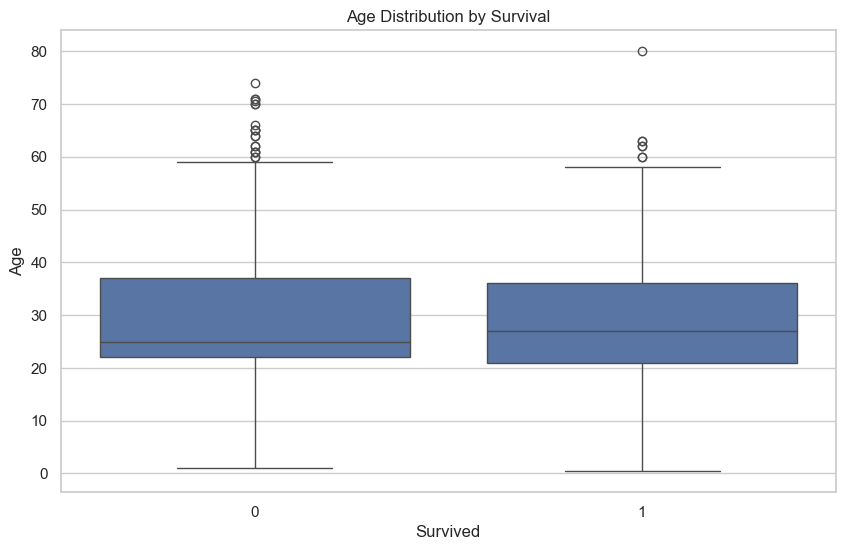

In [22]:
sns.boxplot(data=df, x='Survived', y='Age')
plt.title("Age Distribution by Survival")
plt.show()


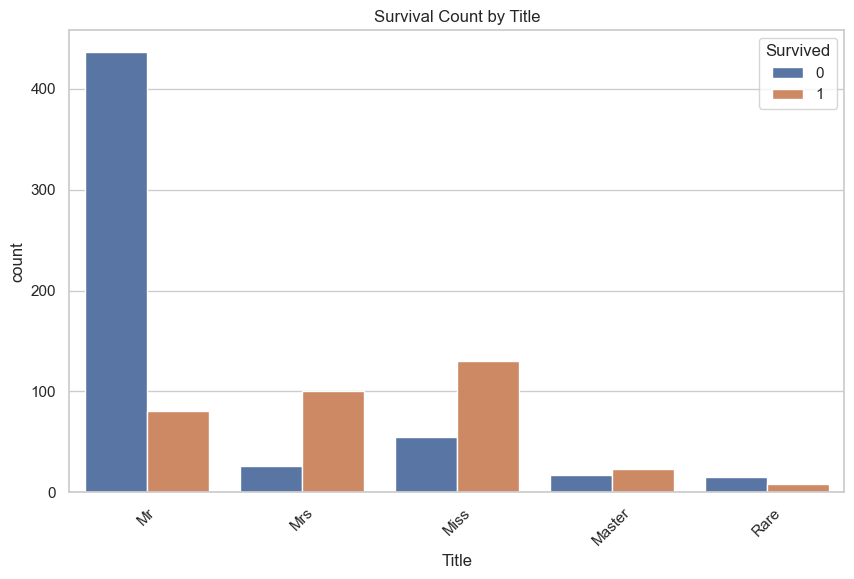

In [23]:
sns.countplot(data=df, x='Title', hue='Survived')
plt.title("Survival Count by Title")
plt.xticks(rotation=45)
plt.show()


## 6. Multivariate Analysis


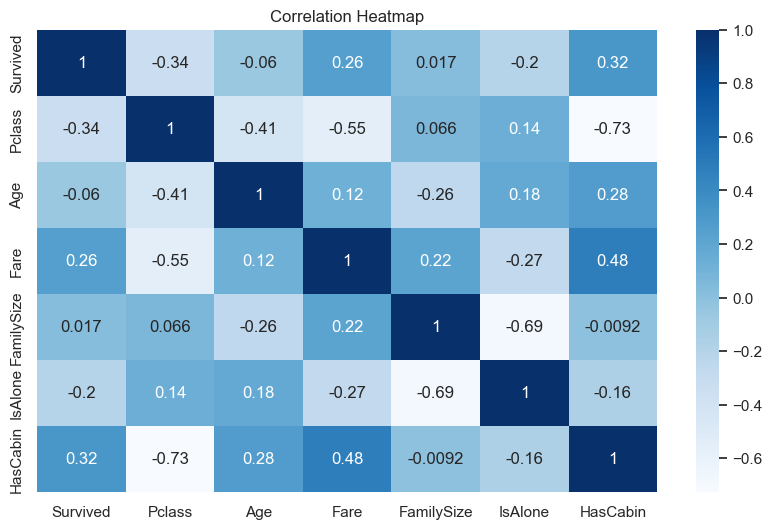

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Survived','Pclass','Age','Fare','FamilySize','IsAlone','HasCabin']]
            .corr(), annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


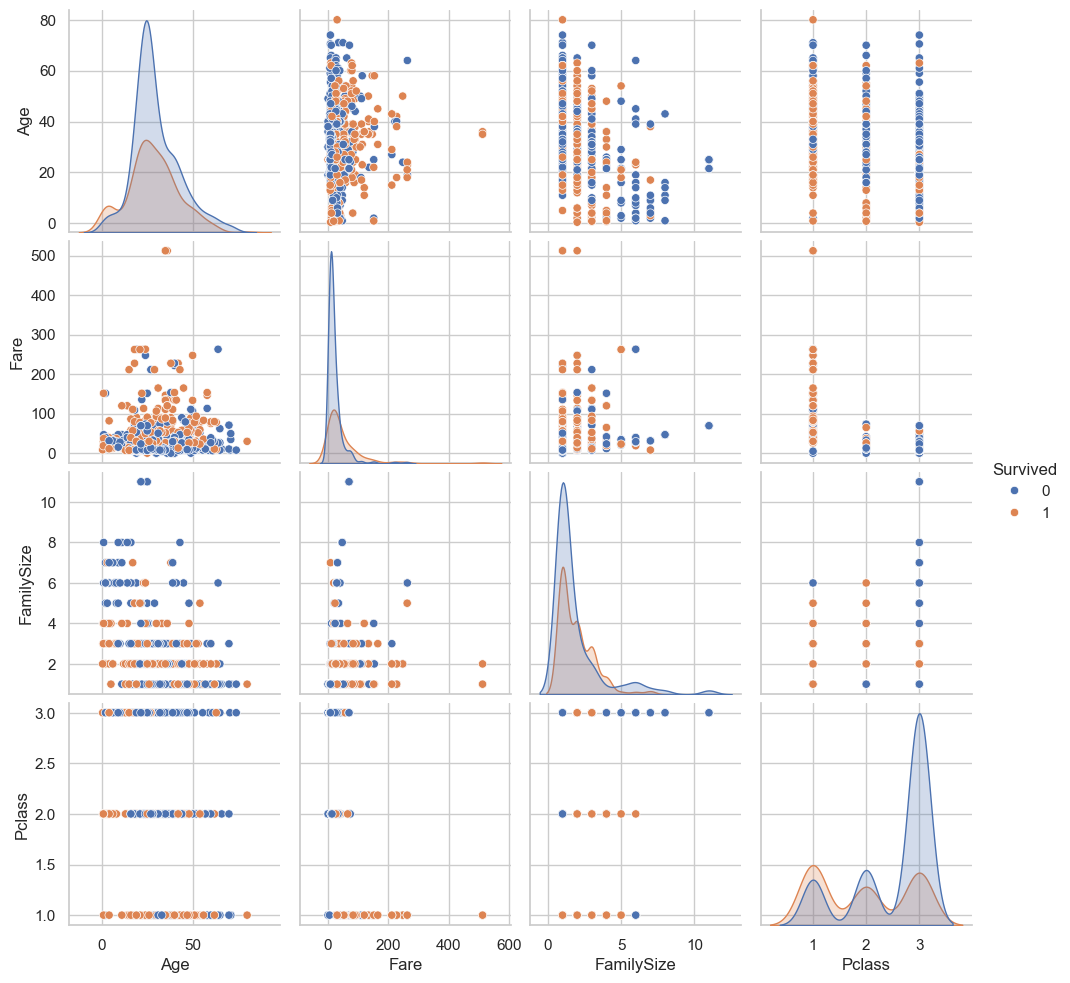

In [25]:
sns.pairplot(df[['Survived','Age','Fare','FamilySize','Pclass']], 
             hue='Survived', diag_kind='kde')
plt.show()


## 7. Summary of Insights


### Key Insights from the Titanic Dataset
- Approximately 38% of passengers survived, indicating low overall survival.
- Females had a significantly higher survival rate than males, showing “women and children first” behavior.
- Passenger Class strongly influenced survival: 1st class passengers survived more, while 3rd class had the lowest survival.
- Younger passengers, especially children, had higher survival rates.
- Higher fare correlates with better survival chances, suggesting wealthier passengers were safer.
- Titles extracted from passenger names showed strong patterns: “Miss” and “Mrs” had higher survival than “Mr”.
- Passengers traveling alone had lower survival compared to those with family.
- Presence of a cabin (HasCabin = 1) was associated with higher survival, likely because cabin information was more complete for higher-class passengers.
